###                                         <font color = 'Red'>**Project pro ASSIGNMENT TASK**</font>

### <font color = 'blue'>**Problem Statement**</font>

### Aim  is to predict whether the customer will churn or not

### <font color = 'blue'>**Importing Necessary Libraries**</font>

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

###  <font color = 'blue'>**Loding the dataset**</font>

In [101]:
df=pd.read_csv(r"C:\Users\bangarraju\Downloads\Data Set.csv")

In [102]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75.0,no,yes,182.25,11.3,20.66,97,5.0,4,2,NaN
1996,2015,998086,383-9255,Male,45,127.0,no,no,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,2015,998474,353-2080,NaN,53,94.0,no,no,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,2015,998934,359-7788,Male,40,94.0,no,no,178.05,10.4,20.18,100,6.0,NaN,3,0.0


In [103]:
## Dataframe info consists of 2000 enteries and 16 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   1980 non-null   float64
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     1990 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          1975 non-null   float64
 13  maximum_days_inactive   1972 non-null   object 
 14  customer_support_calls  2000 non-null   

In [104]:
df.shape

(2000, 16)

In [105]:
## Statistical Analysis of the data
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
count,2000.000000,2000.000000,2000.00000,1980.000000,1990.000000,2000.000000,2000.000000,2000.000000,1975.000000,2000.000000,1965.000000
mean,2015.322000,554887.157500,38.69050,99.888384,454.721809,10.198700,30.620780,100.415500,4.488608,1.547000,0.133333
std,1.466762,261033.690318,10.20641,39.727167,2235.190834,2.785519,9.129165,19.529454,2.491067,1.315164,0.340021
min,2015.000000,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000
25%,2015.000000,328634.750000,32.00000,73.000000,219.450000,8.400000,24.735000,87.000000,3.000000,1.000000,0.000000
50%,2015.000000,567957.500000,37.00000,99.000000,271.875000,10.200000,30.590000,101.000000,4.000000,1.000000,0.000000
75%,2015.000000,773280.250000,44.00000,127.000000,326.212500,12.000000,36.797500,114.000000,6.000000,2.000000,0.000000
max,2022.000000,999961.000000,82.00000,243.000000,27990.000000,20.000000,59.640000,175.000000,19.000000,9.000000,1.000000


In [106]:
## checking the total null values in each column
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed     20
multi_screen               0
mail_subscribed            0
weekly_mins_watched       10
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched            25
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [107]:
## checking the null values in percentages
df.isnull().sum()/len(df)*100

year                      0.00
customer_id               0.00
phone_no                  0.00
gender                    1.20
age                       0.00
no_of_days_subscribed     1.00
multi_screen              0.00
mail_subscribed           0.00
weekly_mins_watched       0.50
minimum_daily_mins        0.00
maximum_daily_mins        0.00
weekly_max_night_mins     0.00
videos_watched            1.25
maximum_days_inactive     1.40
customer_support_calls    0.00
churn                     1.75
dtype: float64

In [108]:
# checking for unique values and any inconsistency in the data

In [109]:
d={}
for i in df.columns:
    if i  not in  d:
        d[i]=df[i].unique()   


In [110]:
d

{'year': array([2015, 2022], dtype=int64),
 'customer_id': array([100198, 100643, 100756, ..., 998474, 998934, 999961], dtype=int64),
 'phone_no': array(['409-8743', '340-5930', '372-3750', ..., '353-2080', '359-7788',
        '414-1496'], dtype=object),
 'gender': array(['Female', nan, 'Male', '1', '0', '9', '4'], dtype=object),
 'age': array([36, 39, 65, 24, 40, 31, 54, 61, 34, 30, 23, 21, 44, 45, 59, 57, 32,
        50, 28, 37, 63, 33, 35, 52, 48, 55, 41, 43, 38, 26, 29, 27, 56, 49,
        47, 42, 67, 46, 64, 66, 22, 51, 25, 62, 53, 19, 76, 60, 58, 75, 20,
        74, 77, 82, 80, 71, 73, 18, 70, 72, 69, 68, 79], dtype=int64),
 'no_of_days_subscribed': array([ 62., 149., 126., 131., 191.,  65.,  59.,  50., 205.,  63., 114.,
        107.,  84., 142., 137., 100.,  99., 115., 194., 104., 170.,  76.,
         94.,  81., 119., 138., 124.,  48., 106., 161.,  89., 105.,  67.,
        129.,  56.,  95.,  37.,  80., 190., 168., 166.,  42.,  96.,  77.,
         54.,  41.,  53.,  98.,  90., 146

In [111]:
target_nan_data = df[df['churn'].isna()]  

In [112]:
target_nan_data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
81,2015,129137,335-7257,Female,36,92.0,no,yes,276.00,12.7,31.28,96,3.0,NaN,2,NaN
82,2015,129487,377-9178,Female,39,103.0,no,no,240.30,9.7,27.23,97,2.0,NaN,0,NaN
120,2015,148624,410-5713,Male,32,66.0,no,yes,262.05,8.9,29.70,98,2.0,3,1,NaN
121,2015,148676,370-7546,Male,37,87.0,no,no,235.20,7.6,26.66,77,6.0,3,1,NaN
156,2015,165361,380-8727,Female,37,99.0,no,no,173.25,11.5,19.64,98,7.0,4,7,NaN
157,2015,165883,358-9095,Female,28,128.0,no,no,356.85,13.9,40.44,68,4.0,4,1,NaN
194,2015,184762,357-1909,Male,31,151.0,yes,no,327.00,12.4,37.06,95,1.0,4,0,NaN
195,2015,184815,397-7500,Male,40,105.0,no,yes,211.80,11.4,24.00,101,2.0,4,1,NaN
228,2015,200466,374-1551,Male,38,80.0,no,no,177.15,8.2,20.08,86,6.0,3,1,NaN
290,2015,230769,366-7247,Male,60,93.0,yes,no,325.35,17.5,36.87,110,5.0,5,1,NaN


In [113]:
## Categorical and numerical features checking

In [114]:
numerical_columns=df.select_dtypes(include=['number']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [115]:
numerical_columns

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'customer_support_calls',
       'churn'],
      dtype='object')

In [116]:
categorical_columns

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed',
       'maximum_days_inactive'],
      dtype='object')

###  <font color = 'blue'>**Data preprocessing**</font>

In [117]:
## handling gender column consists of nan values and also inavalid values

In [118]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0]) 

In [119]:
df['gender'].unique()

array(['Female', 'Male', '1', '0', '9', '4'], dtype=object)

In [120]:
for i in df['gender']:
    if i.isdigit():
        df['gender']=df["gender"].replace(i,"Male")
        

In [121]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [122]:
## handling mail_subscribed column consists of nan values and also inavalid values

In [123]:
df['mail_subscribed'].mode()

0    no
dtype: object

In [124]:
for i in df['mail_subscribed']:
    if i=="yes":
        
        df['mail_subscribed']=df['mail_subscribed'].replace(i,"yes")
    elif i=='no':
        df['mail_subscribed']=df['mail_subscribed'].replace(i,"no")
        
    elif type(float(i))==float:
        
        df['mail_subscribed']=df['mail_subscribed'].replace(i,"no")        

In [125]:
df['mail_subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [126]:
## handling no_of_days_subscribed column consists of nan values and also inavalid values

In [127]:
df["no_of_days_subscribed"].mode()

0    86.0
dtype: float64

In [128]:
df['no_of_days_subscribed'] = df['no_of_days_subscribed'].fillna(df['no_of_days_subscribed'].mode()[0])

In [129]:
df['no_of_days_subscribed'].unique()

array([ 62., 149., 126., 131., 191.,  65.,  59.,  50., 205.,  63., 114.,
       107.,  84., 142., 137., 100.,  99., 115., 194., 104., 170.,  76.,
        94.,  81., 119., 138., 124.,  48., 106., 161.,  89., 105.,  67.,
       129.,  56.,  95.,  37.,  80., 190., 168., 166.,  42.,  96.,  77.,
        54.,  41.,  53.,  98.,  90., 146.,  51.,  97.,  55.,  74.,  86.,
        75.,  27., 163.,  44.,  92.,  45., 140., 122., 132., 103., 134.,
       109.,  21., 167.,  35., 177., 118.,  87., 135., 144., 148.,  70.,
        16.,  83.,  72.,  30.,  93.,  91., 110., 128.,  66.,  38.,  64.,
       172.,  82.,  39., 108., 162.,  10., 156., 101.,  68., 111., 112.,
       127.,  61., 158., 192., 136., 116.,  49.,  40., 130., 125.,   9.,
        57.,  88., 151., 113.,  58.,  79., 179.,  17., 117., 152., 159.,
       155.,  43., 123.,   5., 186., 139.,  19., 147.,  34.,  73., 121.,
        78., 153., 171.,  85.,  29., 102., 165.,  36., 150.,  31., 201.,
       174., 141., 157., 178.,  18., 120.,  22., 17

In [130]:
## handling weekly mins watched  column consists of nan values and also inavalid values and also large float values

In [131]:
df['weekly_mins_watched']=df['weekly_mins_watched'].fillna(df['weekly_mins_watched'].mean())

In [132]:
for i in df['weekly_mins_watched']:
    if i>10080:
        df['weekly_mins_watched']=df['weekly_mins_watched'].replace(i,df['weekly_mins_watched'].mean())
        

In [133]:
df['weekly_mins_watched'].max()

1000.0

In [134]:
df['weekly_mins_watched'].unique()

array([148.35, 294.45,  87.3 , ..., 182.25, 128.85, 178.05])

In [135]:
## handling videos_watched  column consists of nan values and also inavalid values

In [136]:
df['videos_watched'].mode()

0    3.0
dtype: float64

In [137]:
df['videos_watched'] = df['videos_watched'].fillna(df['videos_watched'].mode()[0])

In [138]:
df['videos_watched'].unique()

array([ 1.,  3.,  4.,  7.,  6.,  9.,  5.,  2.,  8., 10., 14.,  0., 11.,
       13., 18., 15., 12., 19., 16.])

In [139]:
## handling maximum_days_inactive column consists of nan values and also inavalid values and changing the data type

In [140]:
df['maximum_days_inactive'].mode()

0    3
dtype: object

In [141]:
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mode()[0])

In [142]:
for i in df['maximum_days_inactive']:
    if i=='NO':
        df['maximum_days_inactive']=df['maximum_days_inactive'].replace(i,str(3))
        

In [143]:
df['maximum_days_inactive'].unique()

array(['4', '3', '2', '5', '1', '0', '6'], dtype=object)

In [144]:
## converting object column to int

In [145]:
df['maximum_days_inactive']=df['maximum_days_inactive'].astype('int')

In [146]:
df['maximum_days_inactive'].unique()

array([4, 3, 2, 5, 1, 0, 6])

###  <font color = 'blue'>**Exploratory Data analysis**</font>

In [147]:
# Univariate Analysis

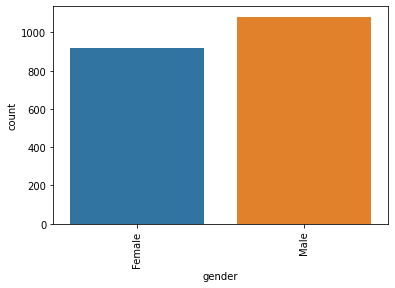

In [148]:
sns.countplot(x="gender", data=df)
plt.xticks(rotation = 90)
plt.show()

In [149]:
#insights:--
# male customers are very more compared to female customers

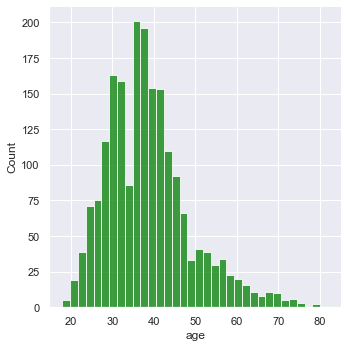

In [153]:
sns.displot(df["age"], kde=False,color="Green")
plt.show()

In [154]:
#insights:--
# MOst of the customers are in the age group of 30 t0 40

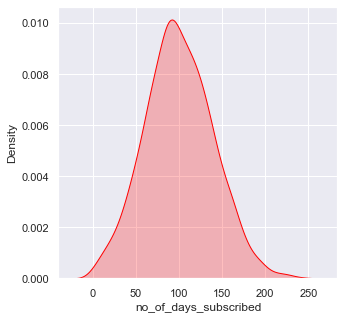

In [155]:
sns.set(rc={"figure.figsize":(5,5)})
sns.kdeplot(df["no_of_days_subscribed"],shade=True,color="red")
plt.show()

In [156]:
#insights:--
# MOst of the customers are subscribed the service in 60-140 range

<AxesSubplot:ylabel='mail_subscribed'>

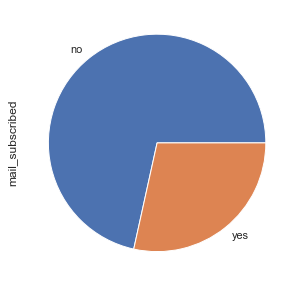

In [157]:
df.mail_subscribed.value_counts().plot(kind ="pie" )

In [158]:
#insights:--
#Most of the customers didnt subscribed the mail 

<AxesSubplot:ylabel='multi_screen'>

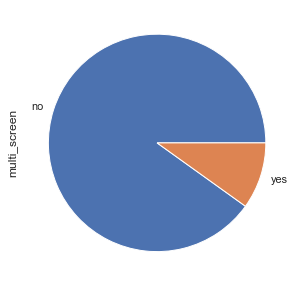

In [159]:
df.multi_screen.value_counts().plot(kind ="pie" )

In [160]:
#insights:--
#Most of the customers didnt have multiscreen options.

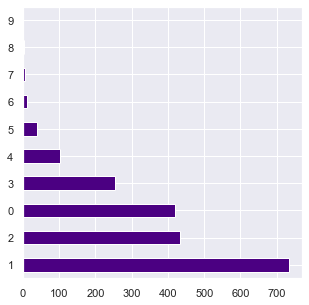

In [161]:
df.customer_support_calls.value_counts().plot(kind = 'barh',color="indigo")
plt.show()

In [162]:
#insights:--
#Most of the customers didnt have multiscreen options.

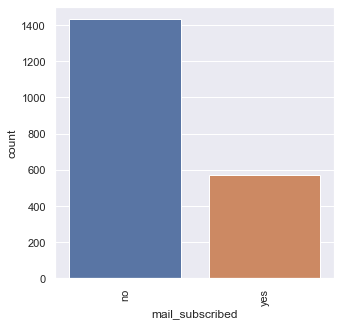

In [163]:
sns.countplot(x="mail_subscribed", data=df)
plt.xticks(rotation = 90)
plt.show()

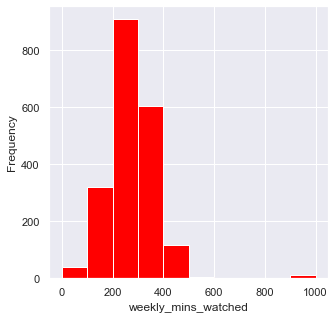

In [164]:
df["weekly_mins_watched"].plot.hist(color="red")
plt.xlabel("weekly_mins_watched")
plt.show()

In [165]:
#insights:--
#Most of the customers watched 200 t0 400 minutes weekly.

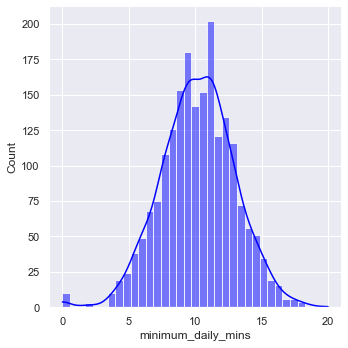

In [166]:
sns.displot(df["minimum_daily_mins"], kde=True,color="blue")
plt.show()

In [167]:
#insights:--
#Most of the customers watched 5 t0 15 minutes  daily minimum.

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='Density'>

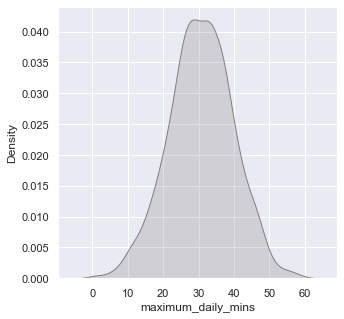

In [168]:
sns.set(rc={"figure.figsize":(5,5)})
sns.kdeplot(df["maximum_daily_mins"],shade=True,color="gray")

In [ ]:
#insights:--
#Most of the customers watched 20  t0 40 minutes  daily maximum.

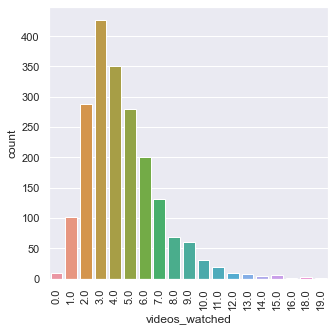

In [150]:
sns.countplot(x="videos_watched", data=df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#insights:--
#Most of the customers watched 3 or 4 or 5 videos.

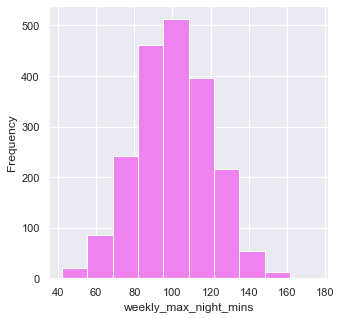

In [60]:
df["weekly_max_night_mins"].plot.hist(color="violet")
plt.xlabel("weekly_max_night_mins")
plt.show()

In [ ]:
#insights:--
#Most of the customers watched 80 minutes  to 140 minutes for weekly maxmimum night minutes.

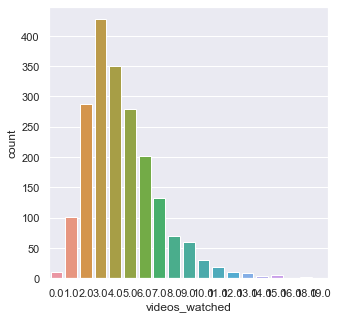

In [61]:
sns.countplot(x="videos_watched", data=df)
plt.show()

In [169]:
#insights:--
#Most of the customers watched videos is in between 3 to 7 range.

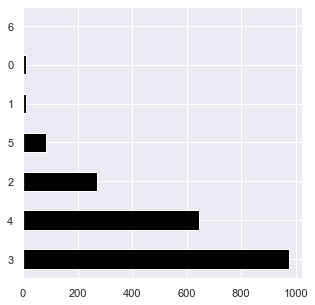

In [62]:
df.maximum_days_inactive.value_counts().plot(kind = 'barh',color="black")
plt.show()

In [ ]:
#insights:--
#up to 1000 no of  the customers nearly inactive for three days .

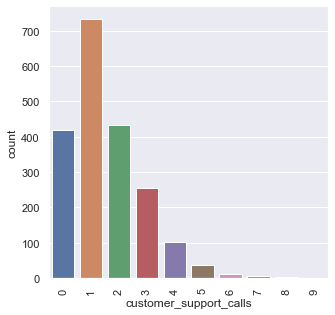

In [63]:
sns.countplot(x="customer_support_calls", data=df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#insights:--
#Most of the customers receives customer support  calls is in between 1 to 3 range.

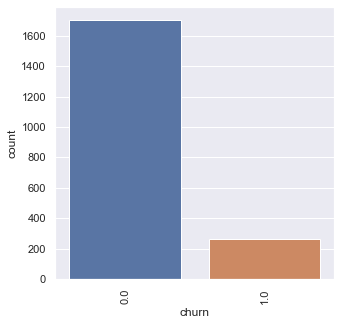

In [64]:
sns.countplot(x="churn", data=df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#insights:--
# form the above we can say that target column is imbalanced having less customers churned.

In [65]:
# Bivariate Analysis and Multivariate Analysis

In [66]:
crosstab = pd.crosstab(df["gender"],df["churn"])

<AxesSubplot:xlabel='gender'>

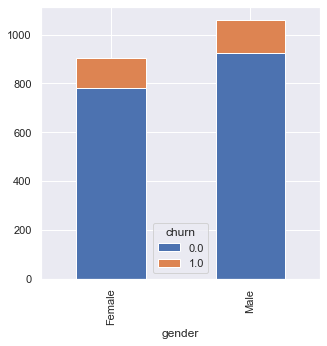

In [67]:

crosstab.plot(kind="bar",stacked=True)

In [ ]:
#insights:--
# form the above we can say that male people are churning more when compared to female

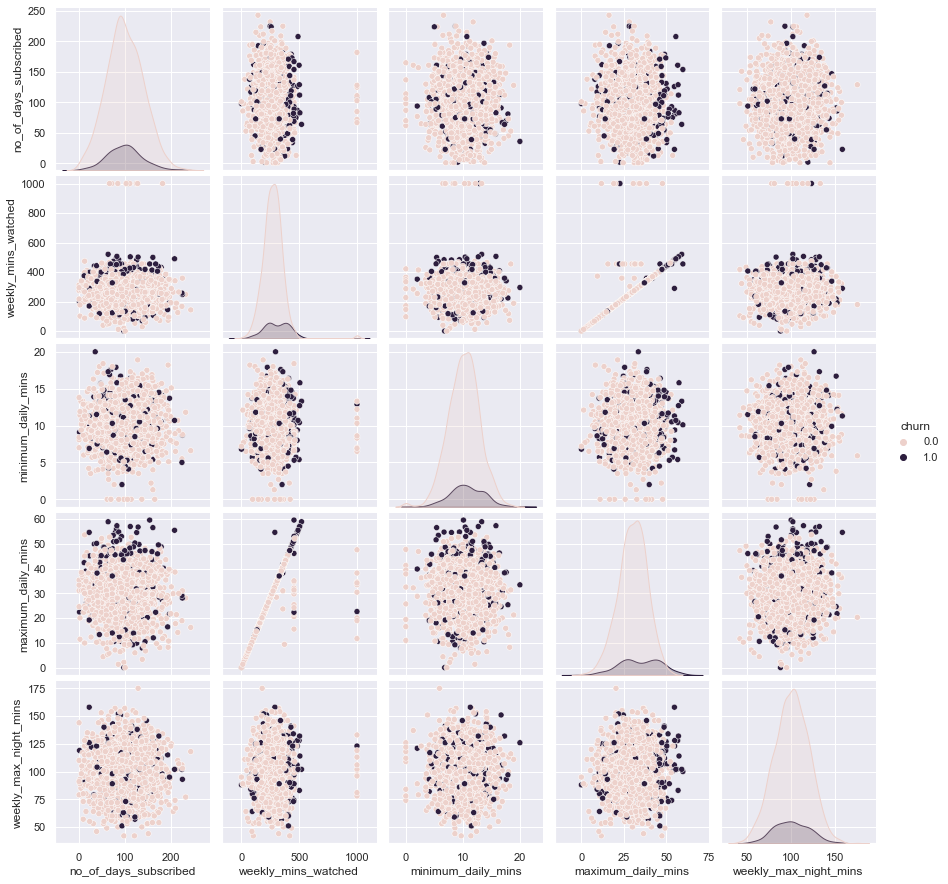

In [70]:
sns.pairplot(data =df, vars=["no_of_days_subscribed","weekly_mins_watched","minimum_daily_mins","maximum_daily_mins","weekly_max_night_mins"],hue="churn")
plt.show()

In [ ]:
## #insights:--
# form the above we can say that there is relation in between the columns hence there is no problem of multicollinearity.

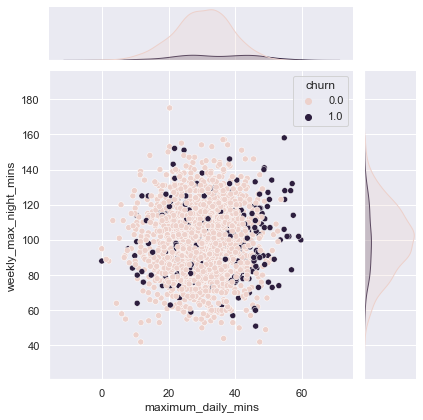

In [71]:
sns.jointplot(data=df, x="maximum_daily_mins", y="weekly_max_night_mins", hue="churn")

In [ ]:
## from the above we can say male churn people are very more when compared to female churn .

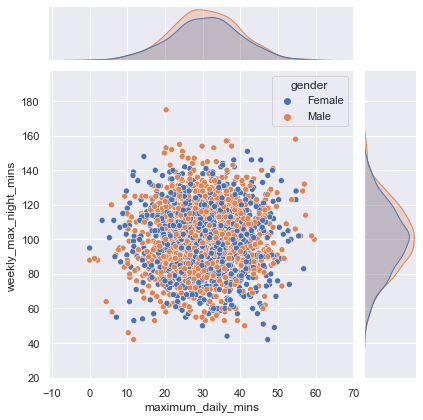

In [72]:
sns.jointplot(data=df, x="maximum_daily_mins", y="weekly_max_night_mins", hue="gender")

In [171]:
crosstab = pd.crosstab(df["videos_watched"],df["churn"])

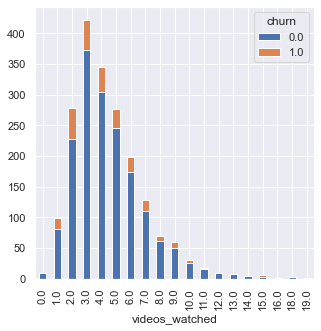

In [172]:
crosstab.plot(kind="bar",stacked=True)
plt.show()

In [174]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75.0,no,yes,182.25,11.3,20.66,97,5.0,4,2,NaN
1996,2015,998086,383-9255,Male,45,127.0,no,no,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,2015,998474,353-2080,Male,53,94.0,no,no,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,2015,998934,359-7788,Male,40,94.0,no,no,178.05,10.4,20.18,100,6.0,3,3,0.0


In [175]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [176]:
df.dropna(inplace=True)

In [177]:
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [178]:
df.shape

(1965, 16)

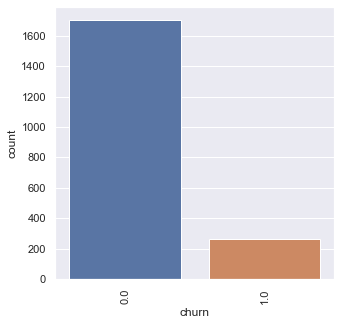

In [179]:
sns.countplot(x="churn", data=df)
plt.xticks(rotation = 90)
plt.show()

In [180]:
#handling categorical Data before training the model

In [181]:
 df['gender']=df['gender'].map({'Female':0,'Male':1})

In [182]:
df['multi_screen']=df['multi_screen'].map({'no':0,'yes':1})

In [183]:
df['mail_subscribed']=df['mail_subscribed'].map({'no':0,'yes':1})

In [184]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2015,994954,329-3222,0,42,119.0,0,1,176.70,7.6,20.03,76,3.0,3,3,0.0
1996,2015,998086,383-9255,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,2015,998474,353-2080,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,2015,998934,359-7788,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [ ]:
## Dropping unnecessary columns which are not required during Analysis

In [185]:
df.drop(['year','customer_id','phone_no'],axis=1,inplace=True)

In [186]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,42,119.0,0,1,176.70,7.6,20.03,76,3.0,3,3,0.0
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [91]:
df.to_csv("C:\\Users\\bangarraju\\Downloads\\CHURN.csv")

In [187]:
X = df.drop(['churn'], axis=1)

Y = df['churn']

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    random_state=42)

## with out handling imbalance   checking model  our performance

### <font color = 'blue'>**Model building and Evaluation**</font>

##  KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier
Knn =  KNeighborsClassifier()
Knn_model = Knn.fit(X_train, Y_train)
Knn_predct = Knn_model.predict(X_test)
print(accuracy_score(Y_test,Knn_predct))
print(confusion_matrix(Y_test,Knn_predct))
print(classification_report(Y_test,Knn_predct))

0.8593220338983051
[[496  13]
 [ 70  11]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       509
         1.0       0.46      0.14      0.21        81

    accuracy                           0.86       590
   macro avg       0.67      0.56      0.57       590
weighted avg       0.82      0.86      0.82       590



### <font color = 'blue'>**confusion metric**</font>

Text(39.5, 0.5, 'Actual')

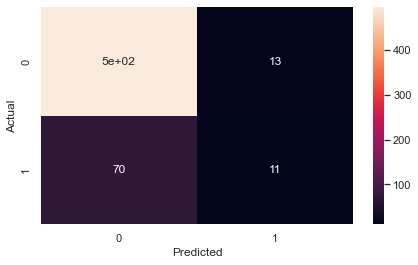

In [201]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,Knn_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### <font color = 'blue'>**AUC-ROC CURVE**</font>

In [202]:
def generate_auc_roc_curve(Knn, X_test):
    y_pred_proba = Knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

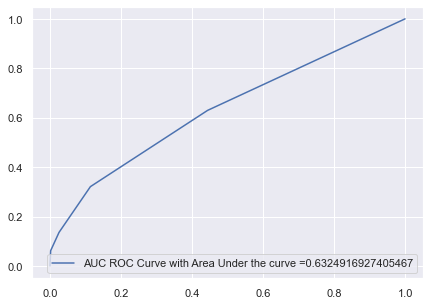

In [203]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Knn, X_test)

## LogisticRegression

In [204]:
Lgr = LogisticRegression()
Lgr_model = Lgr.fit(X_train, Y_train)
Lgr_predct = Lgr_model.predict(X_test)
print(accuracy_score(Y_test,Lgr_predct))
print(confusion_matrix(Y_test,Lgr_predct))
print(classification_report(Y_test,Lgr_predct))

0.8711864406779661
[[507   2]
 [ 74   7]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       509
         1.0       0.78      0.09      0.16        81

    accuracy                           0.87       590
   macro avg       0.83      0.54      0.54       590
weighted avg       0.86      0.87      0.82       590



Text(39.5, 0.5, 'Actual')

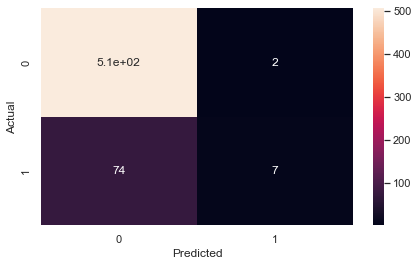

In [195]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,Lgr_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [196]:
def generate_auc_roc_curve(Lgr, X_test):
    y_pred_proba = Lgr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

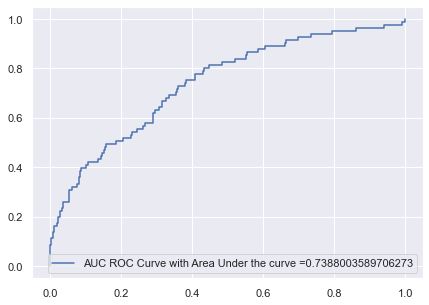

In [197]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Lgr, X_test)

## SVM

In [205]:
from sklearn.svm import SVC
Svm = SVC()
SVM_model = Svm.fit(X_train, Y_train)
SVM_predct = SVM_model.predict(X_test)
print(accuracy_score(Y_test,SVM_predct ))
print(confusion_matrix(Y_test,SVM_predct ))
print(classification_report(Y_test,SVM_predct ))

0.8627118644067797
[[509   0]
 [ 81   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       509
         1.0       0.00      0.00      0.00        81

    accuracy                           0.86       590
   macro avg       0.43      0.50      0.46       590
weighted avg       0.74      0.86      0.80       590



Text(39.5, 0.5, 'Actual')

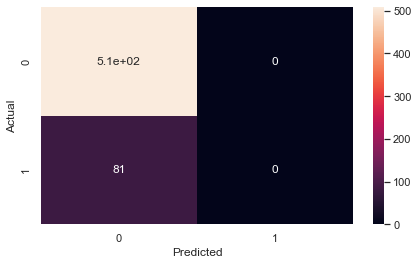

In [206]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,SVM_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [207]:
def generate_auc_roc_curve(Svm, X_test):
    y_pred_proba = Lgr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

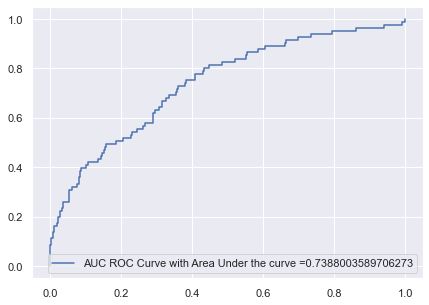

In [208]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Svm, X_test)

## DecisionTreeClassifier

In [209]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT_model = DT.fit(X_train, Y_train)
DT_predct = DT_model.predict(X_test)
print(accuracy_score(Y_test,DT_predct ))
print(confusion_matrix(Y_test,DT_predct ))
print(classification_report(Y_test,DT_predct ))

0.8661016949152542
[[469  40]
 [ 39  42]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       509
         1.0       0.51      0.52      0.52        81

    accuracy                           0.87       590
   macro avg       0.72      0.72      0.72       590
weighted avg       0.87      0.87      0.87       590



Text(39.5, 0.5, 'Actual')

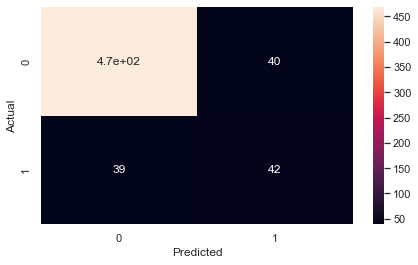

In [210]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,DT_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [211]:
def generate_auc_roc_curve(DT, X_test):
    y_pred_proba = DT.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

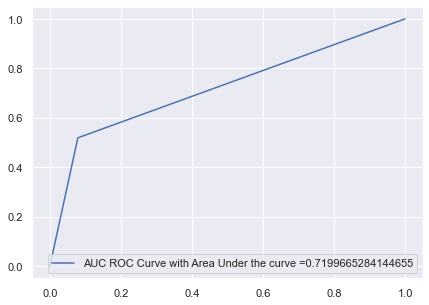

In [212]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(DT, X_test)

## RandomForestClassifier

In [213]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF_model = RF.fit(X_train, Y_train)
RF_predct = RF_model.predict(X_test)
print(accuracy_score(Y_test,RF_predct ))
print(confusion_matrix(Y_test,RF_predct ))
print(classification_report(Y_test,RF_predct ))

0.9169491525423729
[[502   7]
 [ 42  39]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       509
         1.0       0.85      0.48      0.61        81

    accuracy                           0.92       590
   macro avg       0.89      0.73      0.78       590
weighted avg       0.91      0.92      0.91       590



Text(39.5, 0.5, 'Actual')

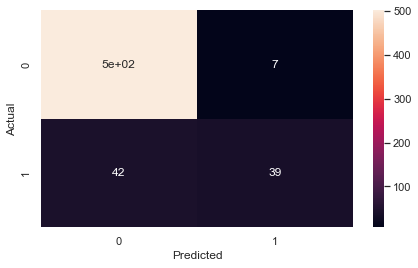

In [214]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,RF_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [215]:
def generate_auc_roc_curve(RF, X_test):
    y_pred_proba = RF.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

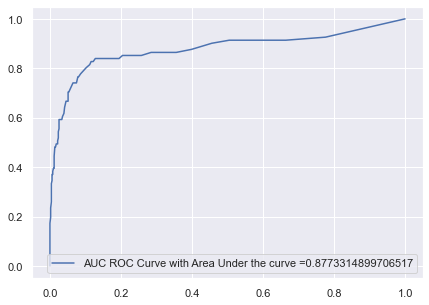

In [216]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(RF, X_test)

## ExtraTreesClassifier

In [217]:
from sklearn.ensemble import ExtraTreesClassifier
ETC= ExtraTreesClassifier()
ETC_model = ETC.fit(X_train, Y_train)
ETC_predct = ETC_model.predict(X_test)
print(accuracy_score(Y_test,ETC_predct ))
print(confusion_matrix(Y_test,ETC_predct))
print(classification_report(Y_test,ETC_predct ))

0.8915254237288136
[[502   7]
 [ 57  24]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       509
         1.0       0.77      0.30      0.43        81

    accuracy                           0.89       590
   macro avg       0.84      0.64      0.68       590
weighted avg       0.88      0.89      0.87       590



Text(39.5, 0.5, 'Actual')

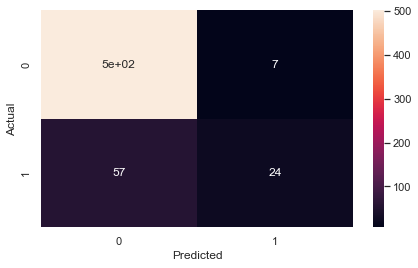

In [218]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,ETC_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [219]:
def generate_auc_roc_curve(ETC, X_test):
    y_pred_proba = RF.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

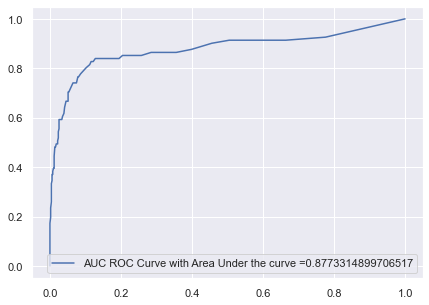

In [220]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(ETC, X_test)

## AdaBoostClassifier

In [221]:
from sklearn.ensemble import AdaBoostClassifier
Abc= AdaBoostClassifier()
ABC_model = Abc.fit(X_train, Y_train)
ABC_predct = ABC_model.predict(X_test)
print(accuracy_score(Y_test,ABC_predct ))
print(confusion_matrix(Y_test,ABC_predct))
print(classification_report(Y_test,ABC_predct ))

0.8949152542372881
[[498  11]
 [ 51  30]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       509
         1.0       0.73      0.37      0.49        81

    accuracy                           0.89       590
   macro avg       0.82      0.67      0.72       590
weighted avg       0.88      0.89      0.88       590



Text(39.5, 0.5, 'Actual')

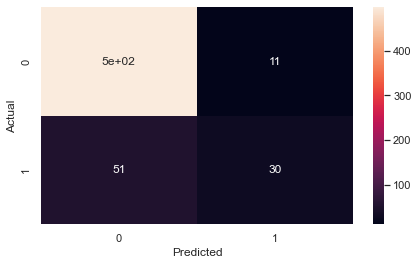

In [222]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,ABC_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [223]:
def generate_auc_roc_curve(Abc, X_test):
    y_pred_proba = Abc.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

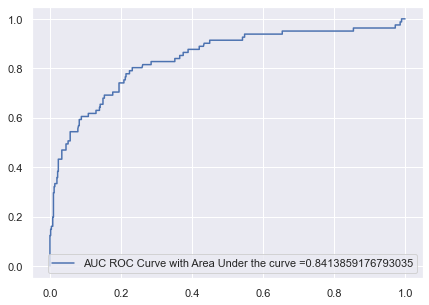

In [224]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Abc, X_test)

## XGBClassifier

In [225]:
from xgboost import XGBClassifier
Xgb = XGBClassifier()
Xgb_model = Xgb.fit(X_train, Y_train)
Xgb_predct = Xgb_model.predict(X_test)
print(accuracy_score(Y_test, Xgb_predct ))
print(confusion_matrix(Y_test, Xgb_predct))
print(classification_report(Y_test, Xgb_predct ))

[08:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9271186440677966
[[499  10]
 [ 33  48]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       509
         1.0       0.83      0.59      0.69        81

    accuracy                           0.93       590
   macro avg       0.88      0.79      0.82       590
weighted avg       0.92      0.93      0.92       590



Text(39.5, 0.5, 'Actual')

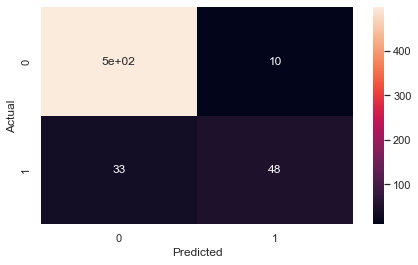

In [226]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test, Xgb_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Handling Imbalanced data With SMOTE

In [227]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [228]:
from collections import Counter
print('Before Smote:',Counter(Y_train))
print('After Smote:',Counter(y_train_res))

Before Smote: Counter({0.0: 1194, 1.0: 181})
After Smote: Counter({0.0: 1194, 1.0: 1194})


## Knn

In [229]:
Knn =  KNeighborsClassifier()
Knn_model_sm = Knn.fit(x_train_res, y_train_res)
Knn_sm_predct = Knn_model_sm.predict(X_test)
print(accuracy_score(Y_test,Knn_sm_predct))
print(confusion_matrix(Y_test,Knn_sm_predct))
print(classification_report(Y_test,Knn_sm_predct))

0.652542372881356
[[341 168]
 [ 37  44]]
              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77       509
         1.0       0.21      0.54      0.30        81

    accuracy                           0.65       590
   macro avg       0.55      0.61      0.53       590
weighted avg       0.81      0.65      0.70       590



Text(39.5, 0.5, 'Actual')

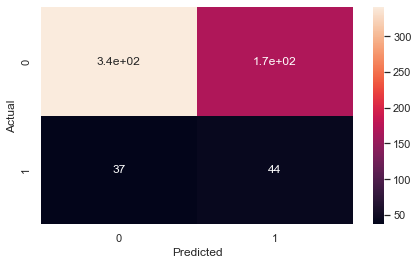

In [230]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,Knn_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [231]:
def generate_auc_roc_curve(Knn, X_test):
    y_pred_proba = Knn_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

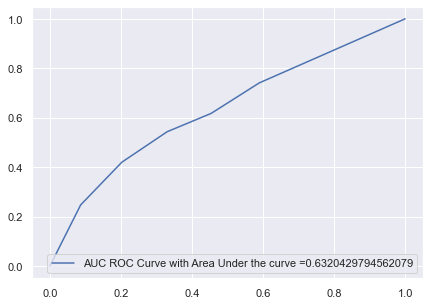

In [232]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Knn, X_test)

## LogisticRegression

In [233]:
Lgr = LogisticRegression()
Lgr_model_sm = Lgr.fit(x_train_res, y_train_res)
Lgr_sm_predct = Lgr_model_sm.predict(X_test)
print(accuracy_score(Y_test,Lgr_sm_predct))
print(confusion_matrix(Y_test,Lgr_sm_predct))
print(classification_report(Y_test,Lgr_sm_predct))

0.7016949152542373
[[372 137]
 [ 39  42]]
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81       509
         1.0       0.23      0.52      0.32        81

    accuracy                           0.70       590
   macro avg       0.57      0.62      0.57       590
weighted avg       0.81      0.70      0.74       590



Text(39.5, 0.5, 'Actual')

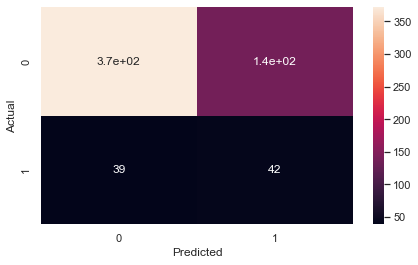

In [234]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,Lgr_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [235]:
def generate_auc_roc_curve(Lgr, X_test):
    y_pred_proba = Lgr_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

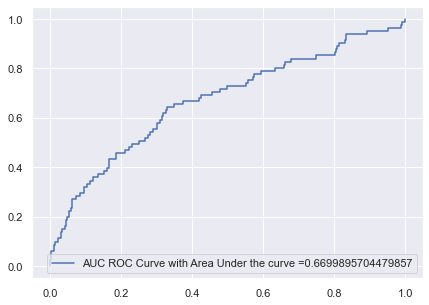

In [236]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Lgr, X_test)

## SVM

In [237]:
Svm = SVC(probability=True)
SVM_model_sm = Svm.fit(x_train_res, y_train_res)
SVM_sm_predct = SVM_model_sm.predict(X_test)
print(accuracy_score(Y_test,SVM_sm_predct ))
print(confusion_matrix(Y_test,SVM_sm_predct ))
print(classification_report(Y_test,SVM_sm_predct))

0.8016949152542373
[[433  76]
 [ 41  40]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       509
         1.0       0.34      0.49      0.41        81

    accuracy                           0.80       590
   macro avg       0.63      0.67      0.64       590
weighted avg       0.84      0.80      0.82       590



Text(39.5, 0.5, 'Actual')

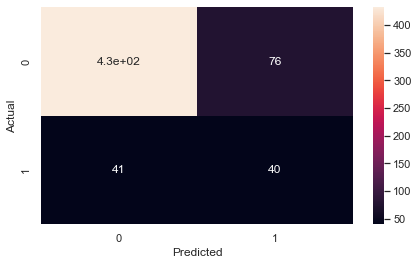

In [238]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,SVM_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [239]:
def generate_auc_roc_curve(Svm, X_test):
    y_pred_proba = SVM_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

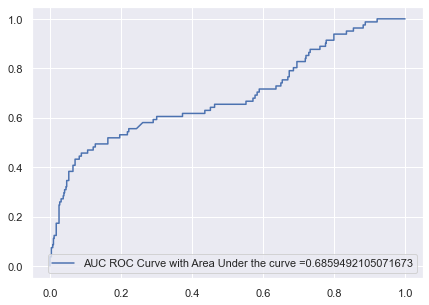

In [240]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Svm, X_test)

## DecisionTreeClassifier

In [241]:
DT= DecisionTreeClassifier()
DT_model_sm = DT.fit(x_train_res, y_train_res)
DT_sm_predct = DT_model_sm.predict(X_test)
print(accuracy_score(Y_test,DT_sm_predct ))
print(confusion_matrix(Y_test,DT_sm_predct ))
print(classification_report(Y_test,DT_sm_predct ))

0.7915254237288135
[[424  85]
 [ 38  43]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       509
         1.0       0.34      0.53      0.41        81

    accuracy                           0.79       590
   macro avg       0.63      0.68      0.64       590
weighted avg       0.84      0.79      0.81       590



Text(39.5, 0.5, 'Actual')

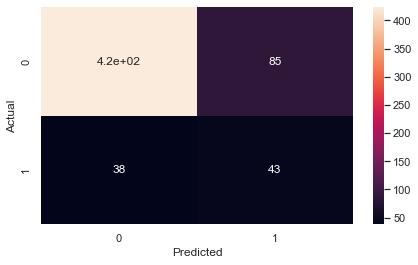

In [242]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test,DT_sm_predct )
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [243]:
def generate_auc_roc_curve(DT, X_test):
    y_pred_proba =  DT_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

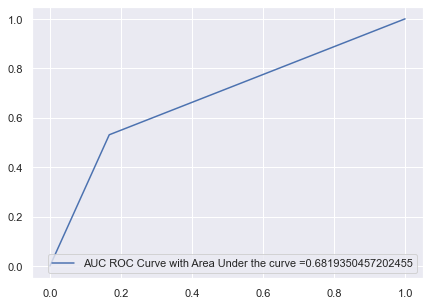

In [244]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(DT, X_test)

## RandomForestClassifier

In [245]:
RF= RandomForestClassifier()
RF_model_sm = RF.fit(x_train_res, y_train_res)
RF_sm_predct = RF_model_sm.predict(X_test)
print(accuracy_score(Y_test,RF_sm_predct ))
print(confusion_matrix(Y_test,RF_sm_predct ))
print(classification_report(Y_test,RF_sm_predct ))

0.8779661016949153
[[475  34]
 [ 38  43]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       509
         1.0       0.56      0.53      0.54        81

    accuracy                           0.88       590
   macro avg       0.74      0.73      0.74       590
weighted avg       0.88      0.88      0.88       590



Text(39.5, 0.5, 'Actual')

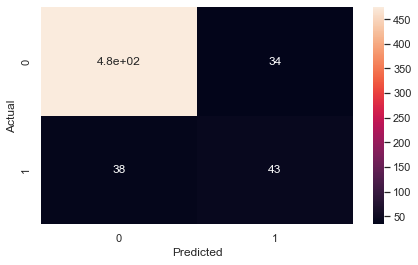

In [246]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test, RF_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [247]:
def generate_auc_roc_curve(RF, X_test):
    y_pred_proba =  RF_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

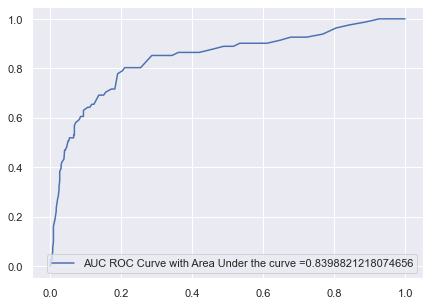

In [248]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(RF, X_test)

## ExtraTreesClassifier

In [249]:
ETC= ExtraTreesClassifier()
ETC_model_sm = ETC.fit(x_train_res, y_train_res)
ETC_sm_predct = ETC_model_sm.predict(X_test)
print(accuracy_score(Y_test,ETC_sm_predct ))
print(confusion_matrix(Y_test,ETC_sm_predct))
print(classification_report(Y_test,ETC_sm_predct ))

0.8559322033898306
[[467  42]
 [ 43  38]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       509
         1.0       0.47      0.47      0.47        81

    accuracy                           0.86       590
   macro avg       0.70      0.69      0.69       590
weighted avg       0.86      0.86      0.86       590



Text(39.5, 0.5, 'Actual')

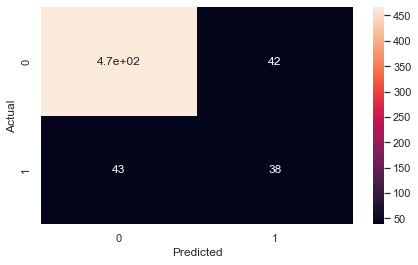

In [250]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test, ETC_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [251]:
def generate_auc_roc_curve(ETC, X_test):
    y_pred_proba =  ETC_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

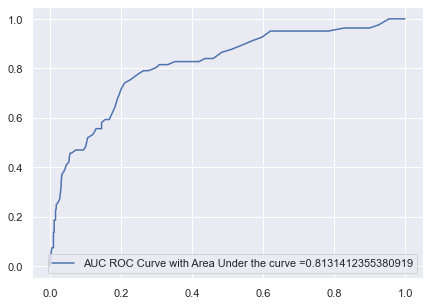

In [252]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(ETC, X_test)

## AdaBoostClassifier

In [253]:
Abc= AdaBoostClassifier()
ABC_model_sm = Abc.fit(x_train_res, y_train_res)
ABC_sm_predct = ABC_model_sm.predict(X_test)
print(accuracy_score(Y_test,ABC_sm_predct ))
print(confusion_matrix(Y_test,ABC_sm_predct))
print(classification_report(Y_test,ABC_sm_predct ))

0.811864406779661
[[436  73]
 [ 38  43]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       509
         1.0       0.37      0.53      0.44        81

    accuracy                           0.81       590
   macro avg       0.65      0.69      0.66       590
weighted avg       0.84      0.81      0.83       590



Text(39.5, 0.5, 'Actual')

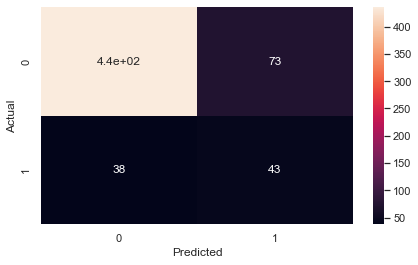

In [254]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test, ABC_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [255]:
def generate_auc_roc_curve(Abc, X_test):
    y_pred_proba =  ABC_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

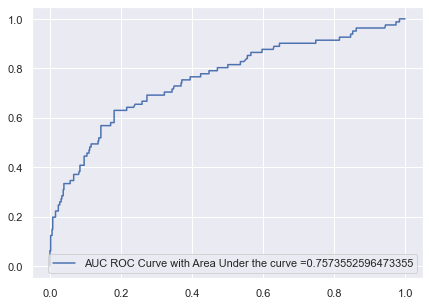

In [256]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Abc, X_test)

## XGBClassifier

In [257]:
Xgb = XGBClassifier()
Xgb_model_sm = Xgb.fit(x_train_res, y_train_res)
Xgb_sm_predct = Xgb_model_sm.predict(X_test)
print(accuracy_score(Y_test, Xgb_sm_predct ))
print(confusion_matrix(Y_test, Xgb_sm_predct))
print(classification_report(Y_test, Xgb_sm_predct ))

[08:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9050847457627119
[[487  22]
 [ 34  47]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       509
         1.0       0.68      0.58      0.63        81

    accuracy                           0.91       590
   macro avg       0.81      0.77      0.79       590
weighted avg       0.90      0.91      0.90       590



Text(39.5, 0.5, 'Actual')

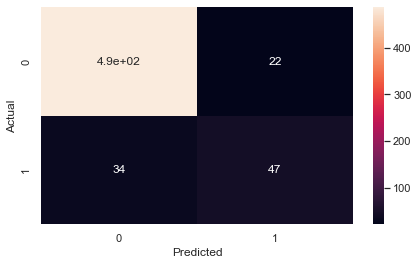

In [258]:
plt.figure(figsize=(7,4))
cm=confusion_matrix(Y_test, Xgb_sm_predct)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [259]:
def generate_auc_roc_curve(Xgb, X_test):
    y_pred_proba =  Xgb_model_sm.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

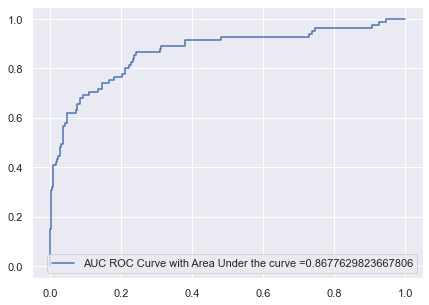

In [260]:
plt.figure(figsize=(7,5))
generate_auc_roc_curve(Xgb, X_test)

## Hyperparameter Tuning of Random Forest

In [266]:
n_estimators = [20,60,100,120,150]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0,0.4]

# Maximum number of levels in tree
max_depth = [2,8,None,4,5]

# Number of samples
max_samples = [0.5,0.75,1.0,0.6]

In [267]:
RF= RandomForestClassifier()

In [268]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120, 150], 'max_features': [0.2, 0.6, 1.0, 0.4], 'max_depth': [2, 8, None, 4, 5], 'max_samples': [0.5, 0.75, 1.0, 0.6]}


In [269]:
# from sklearn.model_selection import RandomizedSearchCV

# rf_grid = RandomizedSearchCV(estimator = RF, 
#                        param_distributions = param_grid, 
#                        cv = 5, 
#                        verbose=2, 
#                        n_jobs = -1)

In [270]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = RF, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [271]:
mdl=rf_grid.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [272]:
predicted = mdl.predict(X_test)

In [273]:
print(classification_report(Y_test, predicted ))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       509
         1.0       0.55      0.54      0.55        81

    accuracy                           0.88       590
   macro avg       0.74      0.74      0.74       590
weighted avg       0.88      0.88      0.88       590



In [ ]:
#BEST parameters

In [274]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 100}

In [ ]:
## best score of randomforest with hyperparameter tuning

In [275]:
rf_grid.best_score_

0.9196214134715752

In [ ]:
## by using hyperparameter tuning the performance of the Randomforest is increased.

## Hyperparameter Tuning of Adaboost Classifier

In [276]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']
Abc= AdaBoostClassifier()

grid_search = GridSearchCV(estimator=Abc, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train_res, y_train_res)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.876515 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}


In [ ]:
## by doing hyperparameter tuning ADaboost clssifier accuracy is increased.

## Hyperparameter Tuning of XGBOOST

In [175]:
n_estimators = [20,60,100,120,150,200,1000,250]
max_depth = [2,None,4,5,8,3,10,15,6]
learning_rate=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,1]
gamma =list(range(0,15))
min_child_weight=[1,2,3,4,5,6,7]

In [176]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
              'gamma':gamma,
              'min_child_weight':min_child_weight
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120, 150, 200, 1000, 250], 'max_depth': [2, None, 4, 5, 8, 3, 10, 15, 6], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1], 'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7]}


In [182]:
Xgb = XGBClassifier()

In [183]:
xb_grid = RandomizedSearchCV (estimator = Xgb, 
                        param_distributions = param_grid, 
                       cv =10, 
                       verbose=2, 
                       n_jobs = -1)

In [184]:
xb_grid.fit(x_train_res, y_train_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[18:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [185]:
xb_grid.best_score_

0.9217186456172428

In [186]:
xb_grid.best_params_

{'n_estimators': 200,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0}

In [ ]:
## By hyperparameter tuning of xgboost classifier the accuracy of xgboost classifier is increased

## 2nd approach 

## with out deleting the Null values in Target column(churn) am predicting that null values with base descion tree model

In [66]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54,75.0,0,1,182.25,11.3,20.66,97,5.0,4,2,NaN
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [55]:
df.shape

(1965, 13)

In [50]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [51]:
df['multi_screen']=df['multi_screen'].map({'no':0,'yes':1})

In [52]:
df['mail_subscribed']=df['mail_subscribed'].map({'no':0,'yes':1})

In [53]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54,75.0,0,1,182.25,11.3,20.66,97,5.0,4,2,NaN
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [ ]:
## subsetting the nan data in target column and we considered it as test data for predection

In [54]:
target_nan_data = df[df['churn'].isna()]  

In [55]:
target_nan_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
81,0,36,92.0,0,1,276.00,12.7,31.28,96,3.0,3,2,NaN
82,0,39,103.0,0,0,240.30,9.7,27.23,97,2.0,3,0,NaN
120,1,32,66.0,0,1,262.05,8.9,29.70,98,2.0,3,1,NaN
121,1,37,87.0,0,0,235.20,7.6,26.66,77,6.0,3,1,NaN
156,0,37,99.0,0,0,173.25,11.5,19.64,98,7.0,4,7,NaN
157,0,28,128.0,0,0,356.85,13.9,40.44,68,4.0,4,1,NaN
194,1,31,151.0,1,0,327.00,12.4,37.06,95,1.0,4,0,NaN
195,1,40,105.0,0,1,211.80,11.4,24.00,101,2.0,4,1,NaN
228,1,38,80.0,0,0,177.15,8.2,20.08,86,6.0,3,1,NaN
290,1,60,93.0,1,0,325.35,17.5,36.87,110,5.0,5,1,NaN


In [56]:
df.dropna(inplace=True)

In [57]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,42,119.0,0,1,176.70,7.6,20.03,76,3.0,3,3,0.0
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [58]:
target_nan_data.shape

(35, 13)

In [59]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,42,119.0,0,1,176.70,7.6,20.03,76,3.0,3,3,0.0
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [60]:
X = df.drop(['churn'], axis=1)

Y = df['churn']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
## Trained the base model  decision tree for prediction

In [62]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT_model = DT.fit(X_train, Y_train)
DT_predct = DT_model.predict(X_test)
print(accuracy_score(Y_test,DT_predct ))
print(confusion_matrix(Y_test,DT_predct ))
print(classification_report(Y_test,DT_predct ))

0.8727735368956743
[[318  26]
 [ 24  25]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       344
         1.0       0.49      0.51      0.50        49

    accuracy                           0.87       393
   macro avg       0.71      0.72      0.71       393
weighted avg       0.88      0.87      0.87       393



In [ ]:
## predicting the target_nan_data with base model decision tree

In [63]:
DT_predct = DT_model.predict(target_nan_data.iloc[:,0:12])

In [64]:
DT_predct

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [ ]:
#for handling imbalance data used smote

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [66]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT_model = DT.fit(x_train_res, y_train_res)
DT_predct = DT_model.predict(X_test)
print(accuracy_score(Y_test,DT_predct ))
print(confusion_matrix(Y_test,DT_predct ))
print(classification_report(Y_test,DT_predct ))

0.821882951653944
[[296  48]
 [ 22  27]]
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       344
         1.0       0.36      0.55      0.44        49

    accuracy                           0.82       393
   macro avg       0.65      0.71      0.66       393
weighted avg       0.86      0.82      0.84       393



In [67]:
DT_predct = DT_model.predict(target_nan_data.iloc[:,0:12])

In [68]:
DT_predct

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [69]:
DT_predct

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [70]:
u=DT_predct.tolist()

In [71]:
u

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0]

In [72]:
target_nan_data['churn']=u

In [73]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,42,119.0,0,1,176.70,7.6,20.03,76,3.0,3,3,0.0
1996,1,45,127.0,0,0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,1,53,94.0,0,0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,1,40,94.0,0,0,178.05,10.4,20.18,100,6.0,3,3,0.0


In [ ]:
## concating the target_nan_data with normal dataframe and again i will building the model 

In [74]:
new_df=pd.concat([df,target_nan_data],axis=0)

In [75]:
new_df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,0,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,0,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,0,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,0,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,47,103.0,0,1,278.10,14.5,31.52,110,4.0,4,2,0.0
915,1,43,172.0,0,0,430.65,14.4,48.81,98,2.0,4,3,1.0
1993,1,36,127.0,0,0,303.15,11.5,34.36,113,3.0,4,2,0.0
1994,0,60,141.0,0,1,310.35,9.3,35.17,124,11.0,3,2,0.0


In [76]:
new_df['churn'].value_counts()

0.0    1729
1.0     271
Name: churn, dtype: int64

In [77]:
X =new_df .drop(['churn'], axis=1)

Y = new_df['churn']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [79]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT_model = DT.fit(X_train, Y_train)
DT_predct = DT_model.predict(X_test)
print(accuracy_score(Y_test,DT_predct ))
print(confusion_matrix(Y_test,DT_predct ))
print(classification_report(Y_test,DT_predct ))

0.875
[[319  26]
 [ 24  31]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       345
         1.0       0.54      0.56      0.55        55

    accuracy                           0.88       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.88      0.88      0.88       400



In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [81]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT_model = DT.fit(x_train_res, y_train_res)
DT_predct = DT_model.predict(X_test)
print(accuracy_score(Y_test,DT_predct ))
print(confusion_matrix(Y_test,DT_predct ))
print(classification_report(Y_test,DT_predct ))

0.785
[[286  59]
 [ 27  28]]
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       345
         1.0       0.32      0.51      0.39        55

    accuracy                           0.79       400
   macro avg       0.62      0.67      0.63       400
weighted avg       0.83      0.79      0.80       400



In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RF= RandomForestClassifier()
RF_model_sm = RF.fit(x_train_res, y_train_res)
RF_sm_predct = RF_model_sm.predict(X_test)
print(accuracy_score(Y_test,RF_sm_predct ))
print(confusion_matrix(Y_test,RF_sm_predct ))
print(classification_report(Y_test,RF_sm_predct ))

0.865
[[318  27]
 [ 27  28]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       345
         1.0       0.51      0.51      0.51        55

    accuracy                           0.86       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.86      0.86      0.86       400



In [84]:
from xgboost import XGBClassifier

In [85]:
Xgb = XGBClassifier()
Xgb_model_sm = Xgb.fit(x_train_res, y_train_res)
Xgb_sm_predct = Xgb_model_sm.predict(X_test)
print(accuracy_score(Y_test, Xgb_sm_predct ))
print(confusion_matrix(Y_test, Xgb_sm_predct))
print(classification_report(Y_test, Xgb_sm_predct ))

[22:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9075
[[332  13]
 [ 24  31]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       345
         1.0       0.70      0.56      0.63        55

    accuracy                           0.91       400
   macro avg       0.82      0.76      0.79       400
weighted avg       0.90      0.91      0.90       400



In [86]:
n_estimators = [20,60,100,120,150,200,1000,250]
max_depth = [2,None,4,5,8,3,10,15,6]
learning_rate=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,1]
gamma =list(range(0,15))
min_child_weight=[1,2,3,4,5,6,7]

In [87]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
              'gamma':gamma,
              'min_child_weight':min_child_weight
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120, 150, 200, 1000, 250], 'max_depth': [2, None, 4, 5, 8, 3, 10, 15, 6], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1], 'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7]}


In [88]:
Xgb = XGBClassifier()

In [89]:
from sklearn.model_selection import RandomizedSearchCV
xb_grid = RandomizedSearchCV (estimator = Xgb, 
                        param_distributions = param_grid, 
                       cv =10, 
                       verbose=2, 
                       n_jobs = -1)

In [90]:
xb_grid.fit(x_train_res, y_train_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[22:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [91]:
predict=xb_grid.predict(X_test)

In [96]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       345
         1.0       0.73      0.60      0.66        55

    accuracy                           0.92       400
   macro avg       0.84      0.78      0.81       400
weighted avg       0.91      0.92      0.91       400



In [ ]:
# XGBoost classifier has highest accuracy with 92%

## comparision of all models after applying smote techniques

In [277]:
values = {'MODEL':['knn','LogisticRegression','SVM','DecisionTree','RandomForest','Extrarandomisedtrees','Adaboostclassifier','xgboostclassifier'],
          'ACCURACY':[0.652542372881356,0.7016949152542373,0.8016949152542373,0.8315254237288135,0.8779661016949153,0.8559322033898306,0.811864406779661,0.9235]}
All_Model_Comparison = pd.DataFrame(values)


In [278]:
All_Model_Comparison

,MODEL,ACCURACY
0,knn,0.652542
1,LogisticRegression,0.701695
2,SVM,0.801695
3,DecisionTree,0.831525
4,RandomForest,0.877966
5,Extrarandomisedtrees,0.855932
6,Adaboostclassifier,0.811864
7,xgboostclassifier,0.923500


# Results

### Xgboost classifier is the best model 

### BY doing hyperparameter tuning  Randomforest classifier accuracy was increased to 91%

### BY doing hyperparameter tuning Adaboost classifier accuracy was increased to 87%

###  Area under the curve for random forest(83%) and xgboost (87%)is very high that means performance is very good

## 2nd approach

# By handling Null values in the target column with out deleting am predicted with by taking decision tree as base model

## In that case also xgboost has highest accuracy with 92%